Data Science Club - Linear Regression 

This project isnt about getting the most accurate model but to get started with basic python and machine learning with python.

NumPy - NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.

Pandas - Pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python.

Sklearn - ML library in Python 

Matplotlib -matplotlib is a plotting library for the Python programming language 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import numpy as np

In [ ]:
#Giving the path where the file is stored. 
#This is useful when you have to work with different files in the same or different folders on your laptop
path = 'Downloads/'

In [ ]:
#Loading the data 
data = pd.read_csv(f'{path}diamonds.csv')

In [ ]:
#If the metadata is available always look at it first before you start exploring the data more

price : price in US dollars ($326 ~ $18,823)

carat : Weight of the Diamond(0.2 ~ 5.01)

cut : Quality of the Cut (Fair, Good, Very Good, Premium, Ideal)

color : Diamond Colour, from J(Worst) I H G F E D(Best)

clarity : measurement of how clear the Diamond is (I1(Worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF(Best))


x : length in mm (0 ~ 10.74)

y : width in mm (0 ~ 58.9)

z : depth in mm (0 ~ 31.8)

depth : total depth percentage = z / mean(x,y) = 2 * z / (x + y) || (43 ~ 79)

table : width of top of Diamond relative to widest point (43 ~ 95)

In [ ]:
#Taking a quick look at your data to get a feel of it 
data.head()

In [ ]:
#Info function helps to understand what datatype each column is and how many non-null entries are there 
#here you can see there are no-null objects
data.info()

In [ ]:
#Describe helps to see descriptive stats of the numerical features in your dataset
data.describe().T

# Cleaning and preprocessing the data

In [ ]:
#For machine learning usually the unique identification of each row is not used, hence i will be deleting the entire columns
#inplace = True tells your dataset to delete in the actual dataset as well 
data.drop(['Unnamed: 0'], axis=1,inplace=True)

After looking at the metadata - I know x, y and z are lengths of the diamond in mm so they cannot be zero. 
Hence the command below is telling to only keep rows where x, y and z are above 0

In [ ]:
data = data[data.x>0]
data = data[data.y>0]
data = data[data.z>0]

# Dealing with Categorical variable 

Linear regression cannot handle string data i.e. categorical data on its own. Hence we need to convert it. 

Categorical variable are of two type 
Nominal - Theres no order - Example - Blue, red, yellow 
Ordinal - Theres some inherent order - Fair, Good Excellent

For the data given to us we have been given order, hence we can change the columns of strings into numerical values in increasing order 

That is what I have done here. 

that commad data.loc is saying - fetch data where column clarity gas the value 'I1' and in that data change the clarity column to 1. 

In [7]:
# Encoding clarity
data.loc[data['clarity'] == 'I1', 'clarity'] = 1
data.loc[data['clarity'] == 'SI2', 'clarity'] = 2
data.loc[data['clarity'] == 'SI1', 'clarity'] = 3
data.loc[data['clarity'] == 'VS2', 'clarity'] = 4
data.loc[data['clarity'] == 'VS1', 'clarity'] = 5
data.loc[data['clarity'] == 'VVS2', 'clarity'] = 6
data.loc[data['clarity'] == 'VVS1', 'clarity'] = 7
data.loc[data['clarity'] == 'IF', 'clarity'] = 8

In [8]:
# Encoding color
data.loc[data['color'] == 'J', 'color'] = 1
data.loc[data['color'] == 'I', 'color'] = 2
data.loc[data['color'] == 'H', 'color'] = 3
data.loc[data['color'] == 'G', 'color'] = 4
data.loc[data['color'] == 'F', 'color'] = 5
data.loc[data['color'] == 'E', 'color'] = 6
data.loc[data['color'] == 'D', 'color'] = 7

In [9]:
# Encoding cut
data.loc[data['cut'] == 'Fair', 'cut'] = 1
data.loc[data['cut'] == 'Good', 'cut'] = 2
data.loc[data['cut'] == 'Very Good', 'cut'] = 3
data.loc[data['cut'] == 'Premium', 'cut'] = 4
data.loc[data['cut'] == 'Ideal', 'cut'] = 5

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a295900f0>,
      dtype=object)

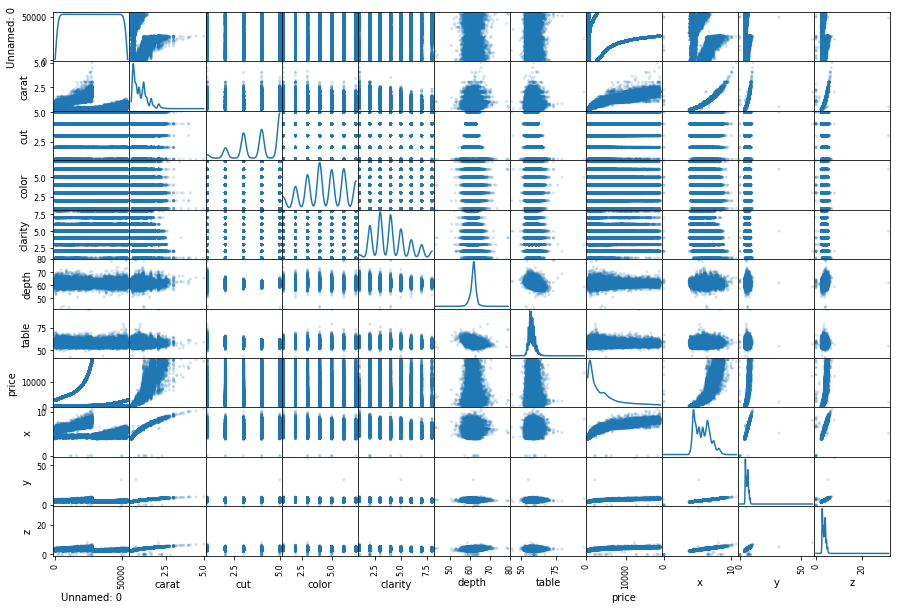

In [15]:
#Plotting all the variables against each other 

from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha=0.2, figsize=(15, 10), diagonal='kde')

In [318]:
#i am creating a copy of the data i have preprocessed and saving it back in a new dataframe incase i want to use this
#later
#you cam ignore this
df = data.copy()
data = df.copy()

# Linear Regression

scikit-learn package has a basic recipe for almost all its model 

For details on any model go and see the scikit learn documentation 

1. You need to divide the model in to X (predictors or features or independent variables) and y (Dependent variable)
2. Ideally create a training and a testing datasets from your X and y variables to see how good your model is or even reduce overfitting (overfitting is where your model is doing very well on training but poorly on testing) 
3. You choose the model for example here is linear regression, inside the bracket you can put hyper paramemers 
4. Fit the model to the training dataset
5. Use predict on your X_test
6. Compare the prediction with your y_test variable 
7. If satisfied you can stop or else repeat steps 3,4,5,6 until done. 

In [18]:
#Explanatory variable X, Response variable y
X = data.drop(['price'], axis=1)
y = data['price']

# Data Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

#Here test size is the split percentage 90% training and 10% Testing
#Random_state is for creating the exact same splits for you and I


In [19]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)


In [324]:
#Model score is giving the Rsquared which explains the variability of model 
# NOTE it doesnt tell how good your model is 
model.score(X_test,y_test)

0.919366601574939

To calculate how good your model is doing, you can calculate the Mean Squared error. 
There are ready made functions available for doing that but I have quickly created a functions to give you an idea of how functions work in python

In [20]:
def mse(preds,y_test) : 
    return(np.mean((y_test-preds)**2))

In [22]:
preds = model.predict(X_test)
mse(preds,y_test)

1547180.9785740369

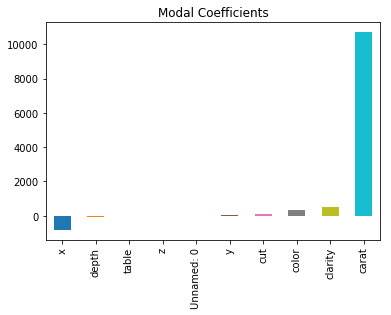

In [23]:
#plotting the model coefficients below

predictors = X_train.columns

coef = pd.Series(model.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

The error seems to be really high, this is because I havent done a lot of preprocessing to the data and not removed outliers if there were any. 
You guys could try preprocessing the data (Link given in the email about what preprocessing the data is)

Below I am creating a few pairs of data which I think could interact with each other to give better predictions, usually new features are created by getting aquainted with thedomain. 

In [25]:
data['new_variable'] = data.carat*data.clarity*data.carat
data['new_variable1'] = data.carat*data.clarity


In [26]:
#repeating the same machine learning recipe steps as above for the new data

X = data.drop(['price'], axis=1)
y = data['price']

# Data Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)


preds = model.predict(X_test)
mse(preds,y_test)

1093695.6042427202

Looks like there was some kind of interaction between the vaiable I chose because the error seems to have dropped by 33% 
Let me know if you find something more interesting

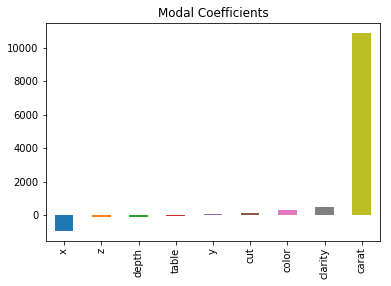

In [248]:
predictors = X_train.columns

coef = pd.Series(model.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

You can not do what i have done below but just for a quick understanding.

The way in R model.summary gives a summary about the predictors with respect to the target, sklearn doesnt provide that but statsmodels does. 

Hence I have just quickly showed you have that works. 

In [297]:
import statsmodels.api as sm
model = sm.OLS(y_test,X_test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     18.95
Date:                Wed, 10 Oct 2018   Prob (F-statistic):           1.33e-14
Time:                        19:52:54   Log-Likelihood:                -11.570
No. Observations:                  61   AIC:                             49.14
Df Residuals:                      48   BIC:                             76.58
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0093      0.005      1.712      0.093      -0.002       0.020
sex           -0.1573      0.108     -1.455      0.152      -0.375       0.060
cp             0.1549      0.049      3.143      0.003       0.056       0.254
trestbps      -0.0059      0.003     -2.250      0.029      -0.011      -0.001
chol          -0.0007      0.001     -0.725      0.472      -0.003       0.001
fbs           -0.0312      0.107     -0.291      0.772      -0.247       0.185
restecg        0.1514      0.093      1.620      0.112      -0.037       0.339
thalach        0.0098      0.002      4.617      0.000       0.006       0.014
exang          0.0520      0.109      0.477      0.635      -0.167       0.271
oldpeak       -0.0668      0.048     -1.404      0.167      -0.162       0.029
slope         -0.1566      0.111     -1.411      0.165      -0.380       0.067
ca            -0.0959      0.044     -2.184      0.034      -0.184      -0.008
thal          -0.0657      0.071     -0.927      0.358      -0.208       0.077
==============================================================================
Omnibus:                        7.351   Durbin-Watson:                   1.663
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                7.309
Skew:                          -0.568   Prob(JB):                       0.0259
Kurtosis:                       4.259   Cond. No.                         942.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""